# Predicting Heart Disease Using Machine Learning

This notebook shows using Python-based machine learning and data science libraries to create a model which can predict if a person has a heart disease or not based on their medical attributes

We're going with the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
> Given clinical parameters of a patient, can we predict if they have heart disease or not

## 2. Data
The original data came from Cleavland dataset from the UCI Machine Learning Repository: [Heart-Disease-UCI-dataset](https://archive.ics.uci.edu/dataset/45/heart+disease)

There is also a version available on kaggle: [Heart-Disease-UCI-kaggle](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

## 3. Evaluation
> If we can reach 95% accuracy when predicting during the proof of concept, we'll pursue the project>

## 4. Features

**Create data dictionary**

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

## Preparing the tools for dataset

We're going to use Pandas, NumPy and matplotlib for data analysis and manipulation

In [1]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline # We want our plots to appear in the notebook

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape    # rows, columns

(303, 14)

## Data exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with

1. What questions are you trying to solve?
2. What kind of data do we have and how can we treat different types?
3. What's missing from the data and how do you deal with it?
4. What are the outliers and how do you deal with them?
5. How can you add change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# How many classes are there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

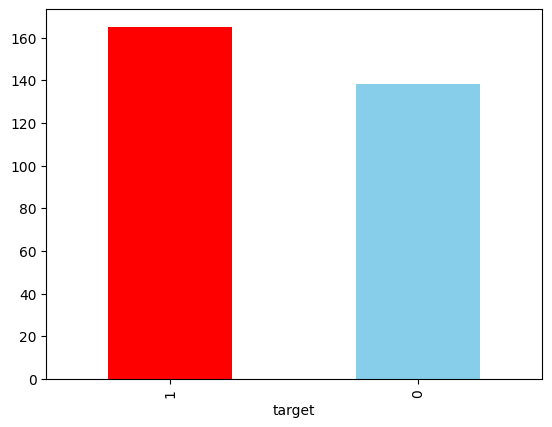

In [6]:

df["target"].value_counts().plot(kind = "bar", color = ["red","skyblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

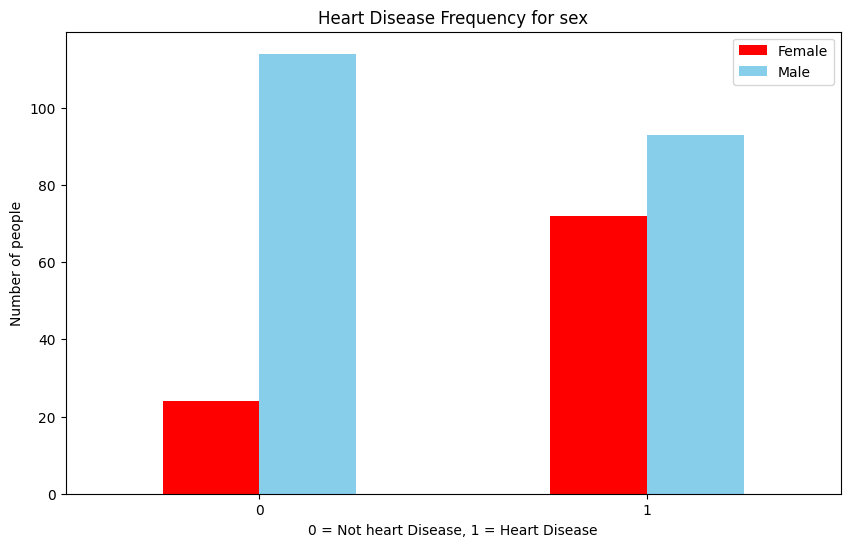

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind = "bar",
                                   figsize = (10, 6),
                                   color = ["red","skyblue"]);
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = Not heart Disease, 1 = Heart Disease")
plt.ylabel("Number of people")
plt.legend(["Female","Male"])
plt.xticks(rotation = 0)   # It makes the 0 and 1 of xlabel vertical, without it they were sideways to the right

In [13]:
df.thalach.value_counts()

thalach
162    11
163     9
160     9
173     8
152     8
       ..
117     1
71      1
118     1
134     1
90      1
Name: count, Length: 91, dtype: int64

Here we see that there are 91 different categories and it's not really good to visualise it with a bar graph, better to use scatter plot

## Age vs Heart Rate for Heart Disease


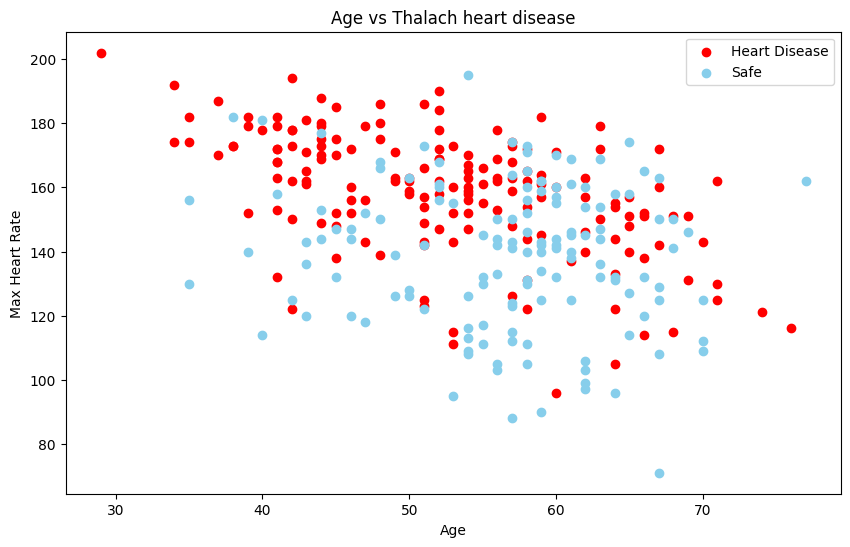

In [14]:
# Create a figure
plt.figure(figsize=(10,6))

# Scatter with examples having heart disease/ Positive example/ Rows with target value 1
plt.scatter(df.age[df.target==1],    # Rows of age with target 1
           df.thalach[df.target==1],
           c = "red");

# Scatter with examples not having heart disease/ negative example/ Rows with target value 0
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c = "skyblue");

# Add some helpful info 
plt.title("Age vs Thalach heart disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease", "Safe"])

<Axes: ylabel='Frequency'>

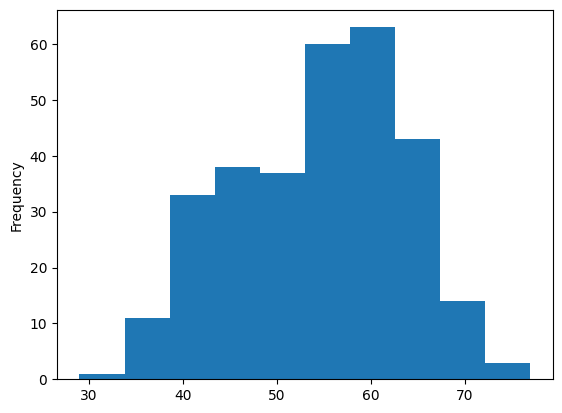

In [15]:
# Check the distribution of the age column
df.age.plot.hist()

### Heart-disease Frequency per Chest pain type

There are 4 chest pain types in this data:
   * 0 : Typical Angina
   * 1 : Atypical Angina
   * 2 : Non-Anginal
   * 3 : Asymptomatic

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


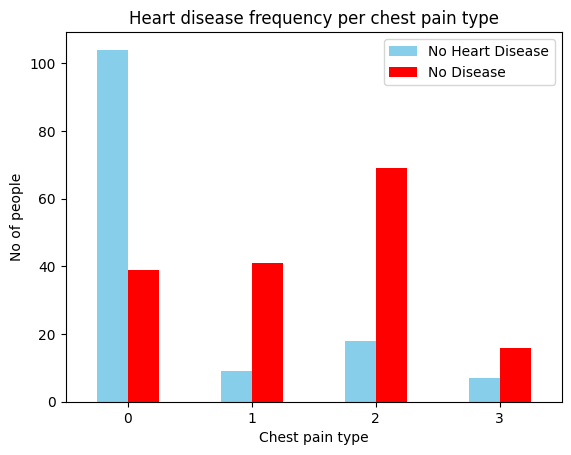

In [17]:
# Make crosstab more visual

pd.crosstab(df.cp,df.target).plot(kind = "bar",
                                 color = ["skyblue", "red"])
# Add some communication
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("No of people")
plt.legend(["No Heart Disease","No Disease"])
plt.xticks(rotation = 0);

In [18]:
# Make a correlation matrix (See the relation between the columns)
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


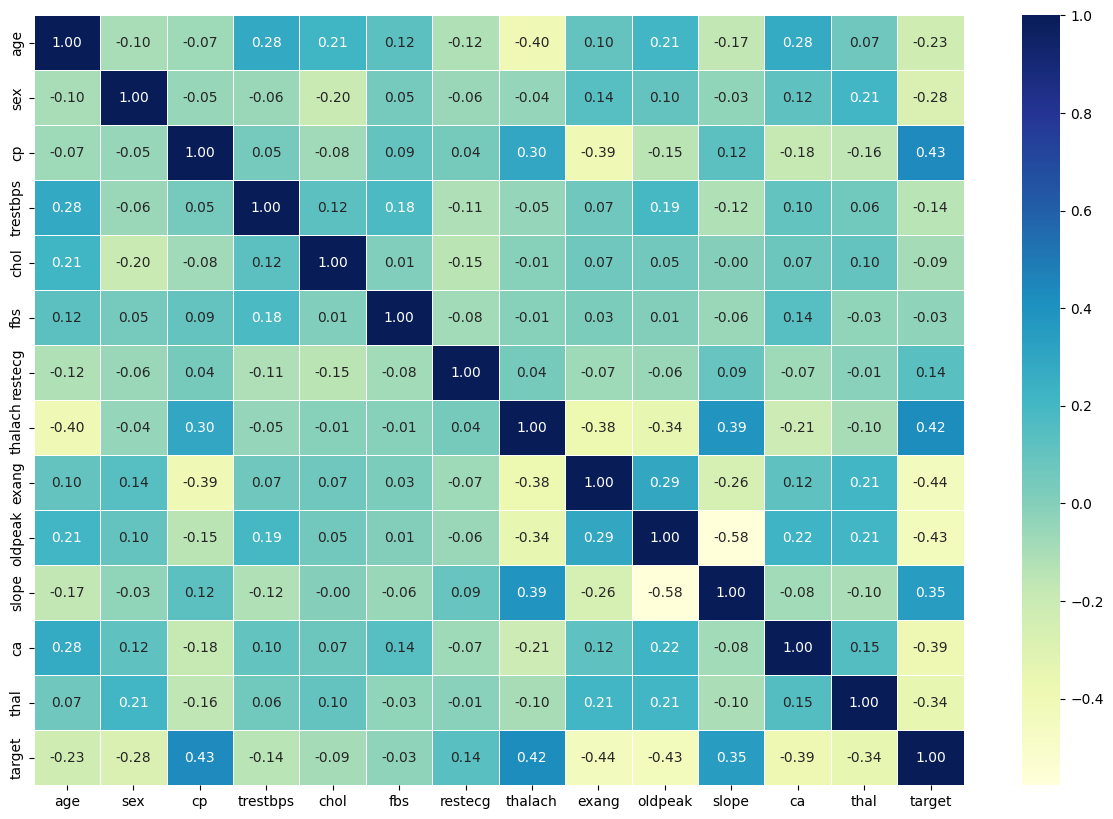

In [19]:
# Making the matrix more prettier
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths= 0.5,
                fmt= ".2f",
                cmap = "YlGnBu");   # Well you can write the colours this way as well rather than a list

## 5. Modelling

Here we are going to create a model to perform EDA, so it can understand the data and find patterns

In [20]:
# Create x & y
x = df.drop('target', axis = 1)

y = df['target']

In [21]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [23]:
# Create train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
186,60,1,0,130,253,0,1,144,1,1.4,2,1,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2


In [24]:
y_train, len(y_train)

(230    0
 200    0
 136    1
 64     1
 171    0
       ..
 114    1
 224    0
 186    0
 126    1
 96     1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into training and test sets, it's time to build our machine learning model

We'll train it (find patterns) on the training set.

And test it (use patterns) on the test set.

The 3 models we are going to use: (Pretending we have tested the Linear SVC)
 1. Logistic regression     [(Why regression)](https://scikit-learn.org/1.5/modules/linear_model.html#logistic-regression)
 2. K-Nearest Neighbors
 3. Random Forest Classifier

In [25]:
# Let's put our models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "RandomForest": RandomForestClassifier()}

# Create a function to fit and score a model
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates the machine learning model
    models : dictionary of scikit-learn models being trained
    x_train, x_test : training data, test data (No lables)
    y_train, y_test : training labels, test labels
    """
    # Set random seed 
    np.random.seed(42)

    # Make a dictianary to store scores of the model
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)

    return model_scores

In [26]:
model_results = fit_and_score(models=models, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
model_results

c:\Coding Grounds\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.6229508196721312,
 'RandomForest': 0.8360655737704918}

(array([0, 1, 2]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'RandomForest')])

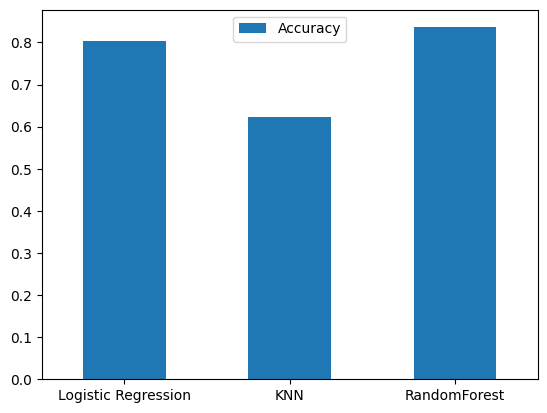

In [27]:
model_compare = pd.DataFrame(model_results,  index = ["Accuracy"])
model_compare.T.plot.bar();     # T  is for transpose and we do that so the bars in the plot can be seen as different bars
plt.xticks(rotation = 0)

Now we've got the base accuracy of our model, and we know we should not base our next steps from the first accuracy of our mode, so what should we do?

For classification we can look at it's following metrics which are, precision, recall and f1 score

let's look at the following: (These will be in almost all problems)
 * Hyperparameter tuning
 * Feature importance

Specific things to look for in a classification problem:-
 * Confusion matrix
 * Cross-validation
 * Precision
 * Recall
 * F1 score
 * Classification Report
 * ROC Curve
 * Area under the curve (AUC)

## Hyperparameter tuning

You can do it in 3 ways: (maybe more but gotta research)
1. By hand
2. RandomizedSearchCV
3. GridSearchCV

## 1. By Hand

In [28]:
# Let's tune KNN (Yes it was the worst of three but just for pracitice)

# Set up train & test score lists
train_scores = []
test_scores = []

# Set up range of parameter for n_neighbors
neighbors = range(1, 21)    # You can see the documentation for this parameter, default is 5, we'll go from 1 to 20

# Set KNN instance
knn = KNeighborsClassifier()

# Iterate through all values of params and train KNN
for i in neighbors:
    knn.set_params(n_neighbors = i)

# Fit the model
    knn.fit(x_train, y_train)

# Update lists with their scores
    train_scores.append(knn.score(x_train, y_train))

    test_scores.append(knn.score(x_test, y_test))

In [29]:
train_scores

[1.0,
 0.8140495867768595,
 0.8140495867768595,
 0.8099173553719008,
 0.7851239669421488,
 0.7851239669421488,
 0.756198347107438,
 0.7479338842975206,
 0.7479338842975206,
 0.7355371900826446,
 0.7355371900826446,
 0.731404958677686,
 0.7231404958677686,
 0.6942148760330579,
 0.6983471074380165,
 0.7024793388429752,
 0.6859504132231405,
 0.6859504132231405,
 0.6818181818181818,
 0.6942148760330579]

In [30]:
test_scores

[0.5409836065573771,
 0.47540983606557374,
 0.5409836065573771,
 0.5737704918032787,
 0.6229508196721312,
 0.5901639344262295,
 0.6557377049180327,
 0.5737704918032787,
 0.639344262295082,
 0.6065573770491803,
 0.5901639344262295,
 0.6229508196721312,
 0.6229508196721312,
 0.6065573770491803,
 0.6229508196721312,
 0.6065573770491803,
 0.6885245901639344,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327]

The maximum score of KNN in test data: 68.85 % 
when the value of neighbors is 17


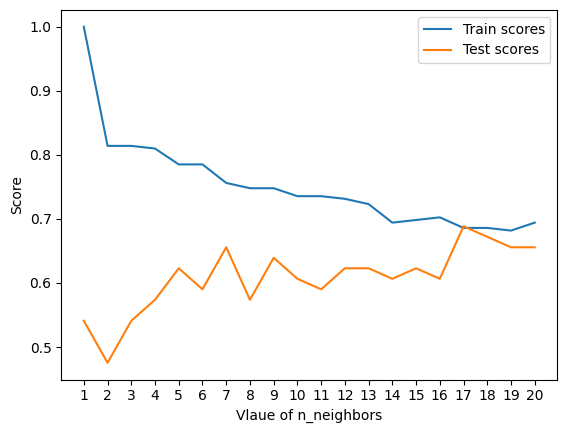

In [31]:
plt.plot(neighbors, train_scores, label = "Train scores")
plt.plot(neighbors, test_scores, label = "Test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Vlaue of n_neighbors")
plt.ylabel("Score")
plt.legend()

print(f"The maximum score of KNN in test data: {max(test_scores)*100:.2f} % \nwhen the value of neighbors is {test_scores.index(max(test_scores))+1}")

We tuned the parameters here by hand and yes now we will remove KNN as it might not perform better than others even after tuning

To check different parameters with different values by hand is just tedious, so 

Now we will use `RandomizedSearchCV` to do the same thing as it can easily do this job and give us the best parameters

## 2. RandomizedSearchCV

We're going to tune:
 * LogisticRegression()
 * RandomForestClassifier()
...using RandomizedSearchCV

In [32]:
# Create a hyperparameter grid for LogisticRegression()
log_reg_grid = {"C": np.logspace(-4,4,20),   # It is the best parameter to check on acc. to research
               "solver": ["liblinear", "newton-cg"]}

# Create a hyperparameter grid for RandomForestClassifier()
rf_grid = {"n_estimators": np.arange(10,1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,10,2)}

Now we've got the grids setup for RandomizedSearchCV to go through and test the models on those randomly,

So now let's tune it with RandomizedSearchCV

In [33]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'newton-cg']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [35]:
rs_log_reg.score(x_test, y_test)

0.8032786885245902

Now we've tuned LogisticRegression, so let's do the same with RandomForestClassifier()

In [36]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)

# Fit random hyperparameter search to RandomForestClassifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
rs_rf.best_params_

{'n_estimators': np.int64(260),
 'min_samples_split': np.int64(8),
 'min_samples_leaf': np.int64(9),
 'max_depth': 3}

In [38]:
rs_rf.score(x_test, y_test)

0.8032786885245902

## 3. GridSearchCV

In [39]:
# Create a hyperparameter grid for LogisticRegression()
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear", "newton-cg"]}

# Setup Gird Search for LogisticRegression
gs_log = GridSearchCV(LogisticRegression(),
                     log_reg_grid,
                     cv=5,
                     verbose= True)

# Fit the hyperparameters to the LogisticRegression
gs_log.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'newton-cg']},
             verbose=True)

In [40]:
# Check best parameters
gs_log.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [41]:
gs_log.score(x_test, y_test)

0.8032786885245902

Here our results from the RandomizedSearchCV and GridSearchCV for LogisticRegression is lower compared to the default, so we'll use the default guy

In [83]:
# Storing the best model for further evaluation
# clf = models['Logistic Regression']
clf = LogisticRegression(max_iter=10000)

## Evaluating our tuned model (classifier), beyond accuracy...

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score

... and it would be great if cross-validation is used where possible

To make comparisons and evaluate our model, we need to make predictions

In [50]:
# Make predictions with tuned model (here base model as it was the best)
y_preds = clf.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [51]:
y_preds == y_test

288     True
1       True
26      True
179     True
99      True
       ...  
155     True
60      True
256     True
98      True
170    False
Name: target, Length: 61, dtype: bool

In [62]:
# Plot ROC curve and calculate AUC metric, for which we will need to calculate FPR and TPR
from sklearn.metrics import roc_curve

# Calculate the positive value probability
y_preds_proba = clf.predict_proba(x_test)
y_proba_pos = y_preds_proba[:,1]

# Calculate FPR & TPR using the roc_curve() function
fpr, tpr, threshold = roc_curve(y_test, y_proba_pos)
fpr, tpr, threshold

(array([0.        , 0.        , 0.        , 0.03333333, 0.03333333,
        0.1       , 0.1       , 0.16666667, 0.16666667, 0.2       ,
        0.2       , 0.23333333, 0.23333333, 0.36666667, 0.36666667,
        1.        ]),
 array([0.        , 0.03225806, 0.09677419, 0.09677419, 0.4516129 ,
        0.4516129 , 0.48387097, 0.48387097, 0.77419355, 0.77419355,
        0.83870968, 0.83870968, 0.96774194, 0.96774194, 1.        ,
        1.        ]),
 array([       inf, 0.99343382, 0.98466083, 0.97119651, 0.93483716,
        0.9165689 , 0.90850716, 0.8810597 , 0.79828916, 0.79819333,
        0.7475764 , 0.74023387, 0.69603739, 0.59417633, 0.58338831,
        0.00120608]))

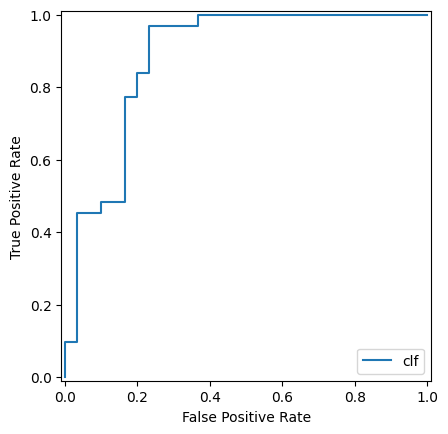

In [63]:
# Plot the ROC curve using these values
RocCurveDisplay(fpr = fpr, tpr = tpr, estimator_name="clf").plot()

In [64]:
# Now to calculate the AUC score
from sklearn.metrics import roc_auc_score

# Use the function to see the AUC score
auc_score = roc_auc_score(y_test, y_proba_pos)
auc_score

np.float64(0.8817204301075268)

```
from sklearn.metrics import auc

area = auc(fpr, tpr)
area
```

It is the same as above, this will calculate the area under the ROC curve

In [67]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[18 12]
 [ 0 31]]


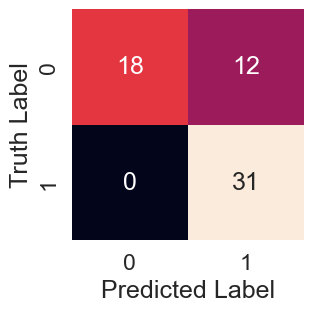

In [69]:
sns.set(font_scale = 1.5)

def plt_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar= False)
    plt.xlabel("Predicted Label")
    plt.ylabel("Truth Label")

plt_conf_mat(y_test, y_preds)

Now we have got the ROC curve and AUC metric and a confusion matrix, let's get a classification report as well as precision, recall and F1 score.

If the False positive rate is 0, our model has 1.0 precision (Which we can see here, the FPR is 0, bottom left box value)

If the False negative rate is 0, our model has 1.0 recall (Here the FNR is 12, top right box)

In [70]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        30
           1       0.72      1.00      0.84        31

    accuracy                           0.80        61
   macro avg       0.86      0.80      0.79        61
weighted avg       0.86      0.80      0.79        61



This classification report is done on a single test set, it's better to use cross-validation 

### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1 score of our model and for that we are going to use `cross_val_score()`.

In [84]:
### Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv = 5,
                        scoring = "accuracy",
                        verbose = True)
cv_acc, np.mean(cv_acc)   # Taking the mean of the 5 cross validations

(array([0.80327869, 0.86885246, 0.85245902, 0.86666667, 0.75      ]),
 np.float64(0.8282513661202187))

In [85]:
### Cross-validated precision
cv_prec = cross_val_score(clf,
                         x,
                         y,
                         cv = 5,
                         scoring="precision")
cv_prec, np.mean(cv_prec)

(array([0.78378378, 0.87878788, 0.85294118, 0.83783784, 0.725     ]),
 np.float64(0.8156701353760176))

In [88]:
### Cross-validated recall
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv = 5,
                         scoring="recall")
cv_recall, np.mean(cv_recall)

(array([0.87878788, 0.87878788, 0.87878788, 0.93939394, 0.87878788]),
 np.float64(0.8909090909090909))

In [89]:
### Cross-validated F1
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv = 5,
                         scoring="f1")
cv_f1, np.mean(cv_f1)

(array([0.82857143, 0.87878788, 0.86567164, 0.88571429, 0.79452055]),
 np.float64(0.8506531565619687))

In [90]:
cv_acc = np.mean(cv_acc)
cv_prec = np.mean(cv_prec)
cv_recall = np.mean(cv_recall)
cv_f1 = np.mean(cv_f1)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Precision'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'F1-score')])

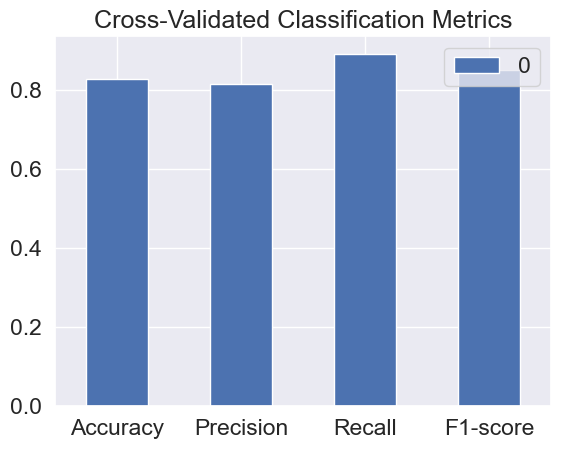

In [92]:
# Visualize the cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_prec,
                          "Recall": cv_recall,
                          "F1-score": cv_f1},
                         index = [0])

cv_metrics.T.plot.bar(title="Cross-Validated Classification Metrics");
plt.xticks(rotation = 0)

The last thing left to find is, 

## **Feature Importance**

It is another way of asking, "Which features contributed the most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.

So what we can do is search for "(MODLE NAME) feature importance", out of which we will find that we should look at coef_

In [93]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [98]:
clf.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

We'll use the coef_ attribute and see how each column it significant to our target column, -ve values means less significant and +ve values means more significant

In [103]:
clf.coef_

array([[ 1.42348237e-03, -1.02718086e+00,  9.13166839e-01,
        -1.62888889e-02,  1.06035273e-04,  9.02388101e-02,
         5.47946965e-01,  2.05810080e-02, -5.93223991e-01,
        -5.91753199e-01,  5.67854146e-01, -7.12358059e-01,
        -1.06103742e+00]])

Here we are getting the abs value for better understanding, higher value means stronger relation

In [104]:
np.abs(clf.coef_)

array([[1.42348237e-03, 1.02718086e+00, 9.13166839e-01, 1.62888889e-02,
        1.06035273e-04, 9.02388101e-02, 5.47946965e-01, 2.05810080e-02,
        5.93223991e-01, 5.91753199e-01, 5.67854146e-01, 7.12358059e-01,
        1.06103742e+00]])

In [105]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.001423482373192741),
 'sex': np.float64(-1.027180864259081),
 'cp': np.float64(0.9131668389244822),
 'trestbps': np.float64(-0.016288888909706523),
 'chol': np.float64(0.00010603527258840562),
 'fbs': np.float64(0.09023881006324555),
 'restecg': np.float64(0.5479469650944149),
 'thalach': np.float64(0.020581007983142087),
 'exang': np.float64(-0.593223991210122),
 'oldpeak': np.float64(-0.5917531987154223),
 'slope': np.float64(0.5678541463200949),
 'ca': np.float64(-0.7123580590707489),
 'thal': np.float64(-1.0610374168938692)}

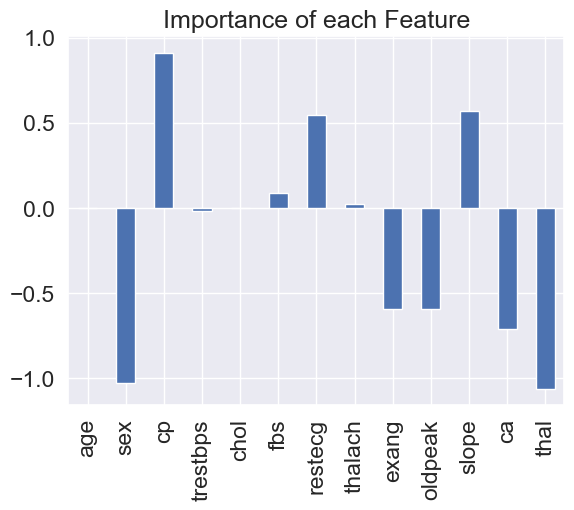

In [108]:
# Visulaize the features importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = "Importance of each Feature", legend = False);

In [109]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [113]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


We can see that sex does not make sense if they have heart disease or not, and slope matters more kinda

## 6. Experimentation

If you haven't reached your evaluation metric (95%), then ask yourself....

* Could you collect more data?
* Could you select another model?  CatBoost or XGBoost?
* Could you improve the model further? (Beyond what we've done)